#Model Yolo

## Set Environment Yolo model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets


!pip install -U ultralytics opencv-python==4.8.0.74 roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.3/645.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00


In [ ]:
from IPython.display import display, Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.210 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 27.2/166.8 GB disk)


## Download custom dataset from roboflow

Dataset Link: https://universe.roboflow.com/smart-football-object-detection/smart-football-object-detection

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR-API-KEY")
project = rf.workspace("howard-morris").project("footbal-players-detection-5axou")
dataset = project.version(3).download("yolov8")


## Train Custom model

In [ ]:
import yaml

data = {
    'names': ['Football', 'Goal_mouth', 'Referee', 'TEAM_1', 'TEAM_2'],
    'nc': 5,
    'roboflow': {
        'license': 'MIT',
        'project': 'footbal-players-detection-5axou',
        'url': 'https://universe.roboflow.com/howard-morris/footbal-players-detection-5axou/dataset/3',
        'version': 3,
        'workspace': 'howard-morris'
    },
    'test': '/content/Footbal-players-detection-3/valid/images',
    'train': '/content/Footbal-players-detection-3/train/images',
    'val': '/content/Footbal-players-detection-3/valid/images'
}

file_path = '/content/Footbal-players-detection-3/data.yaml'

# Writing to the file
with open(file_path, 'w') as file:
    yaml.dump(data, file)

print(f"Data written to {file_path}")


Data written to /content/Footbal-players-detection-3/data.yaml


In [ ]:
import torch

!yolo task=detect mode=train model=yolov8s.pt data="/content/Footbal-players-detection-3/data.yaml" epochs=28 imgsz=800 plots=True



This model save in the folder train

## Visualize training results

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	train_batch218.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch2.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1700166347.06b95bc60a5c.1591.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch216.jpg	weights
P_curve.png					    train_batch217.jpg


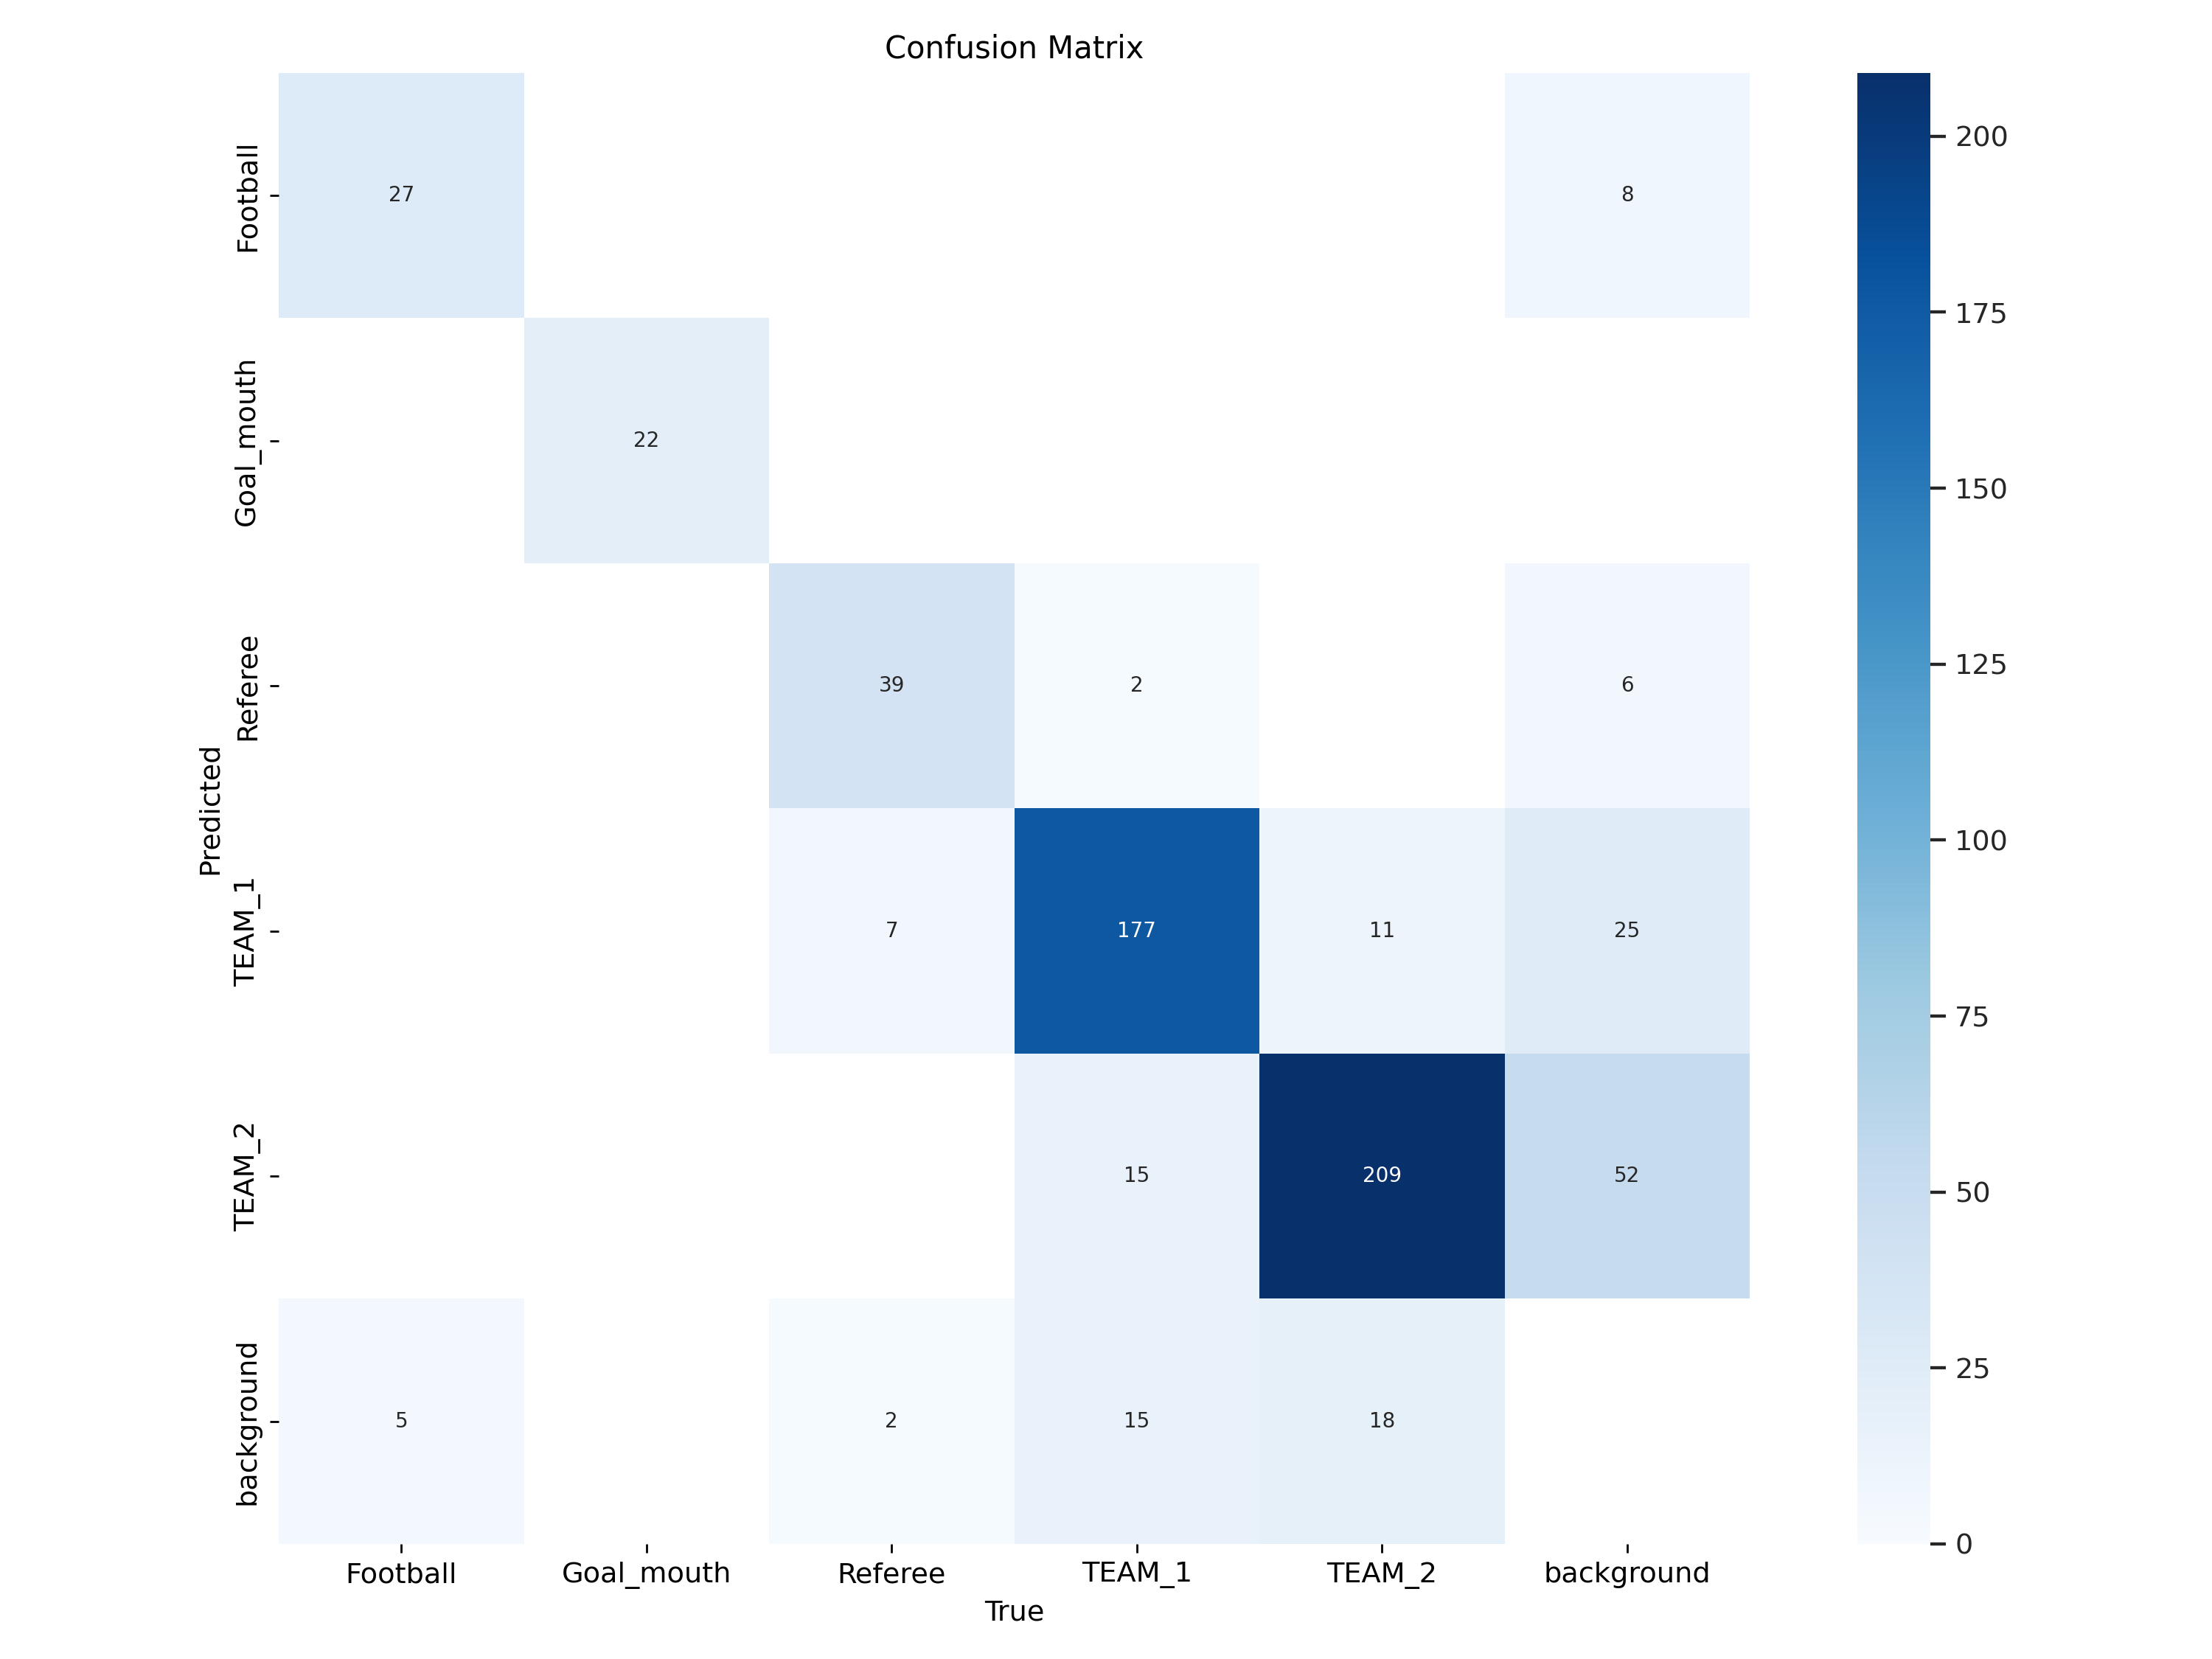

In [ ]:
# Confusion Matrix
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=700)

There is no significant confusion between any two classes, indicating that the model has successfully learned to distinguish between our classes.

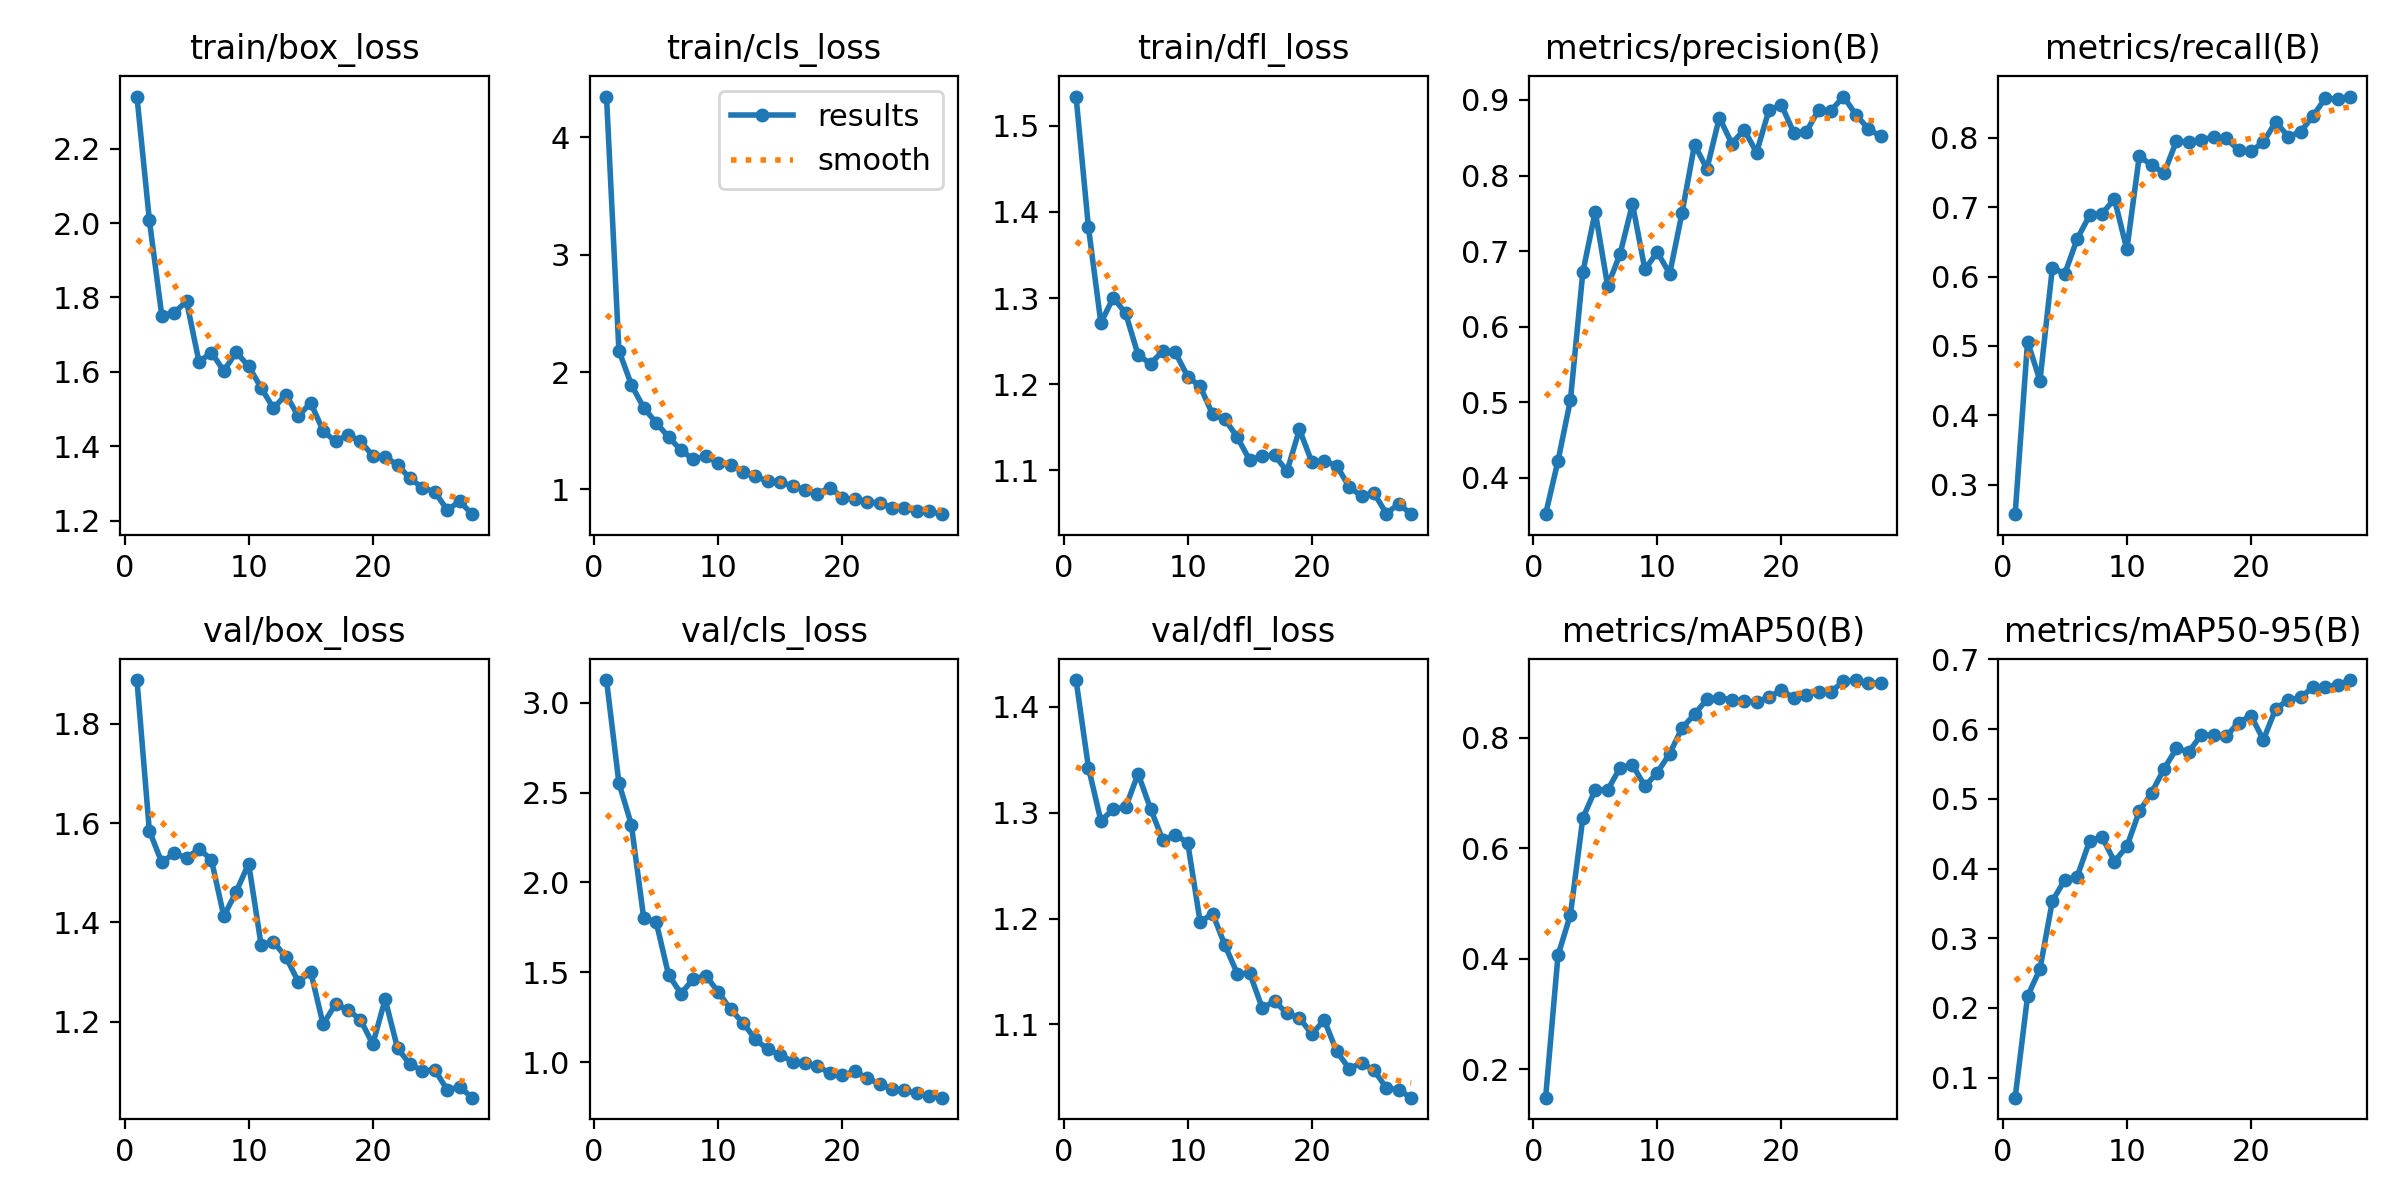

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=700)

* The **box_loss** measures the error in predicted bounding box coordinates and dimensions, with a lower value indicating more accurate predictions.
* The **cls_loss** measures the error in predicted class probabilities, with a lower value indicating more accurate class predictions.
* The **dfl_loss** measures the error in deformable convolution layers, which help detect objects with different scales and aspect ratios, and a lower value indicates better handling of object deformations and variations.

The losses and metrics for both the training and validation are quite similar and fall within acceptable ranges.

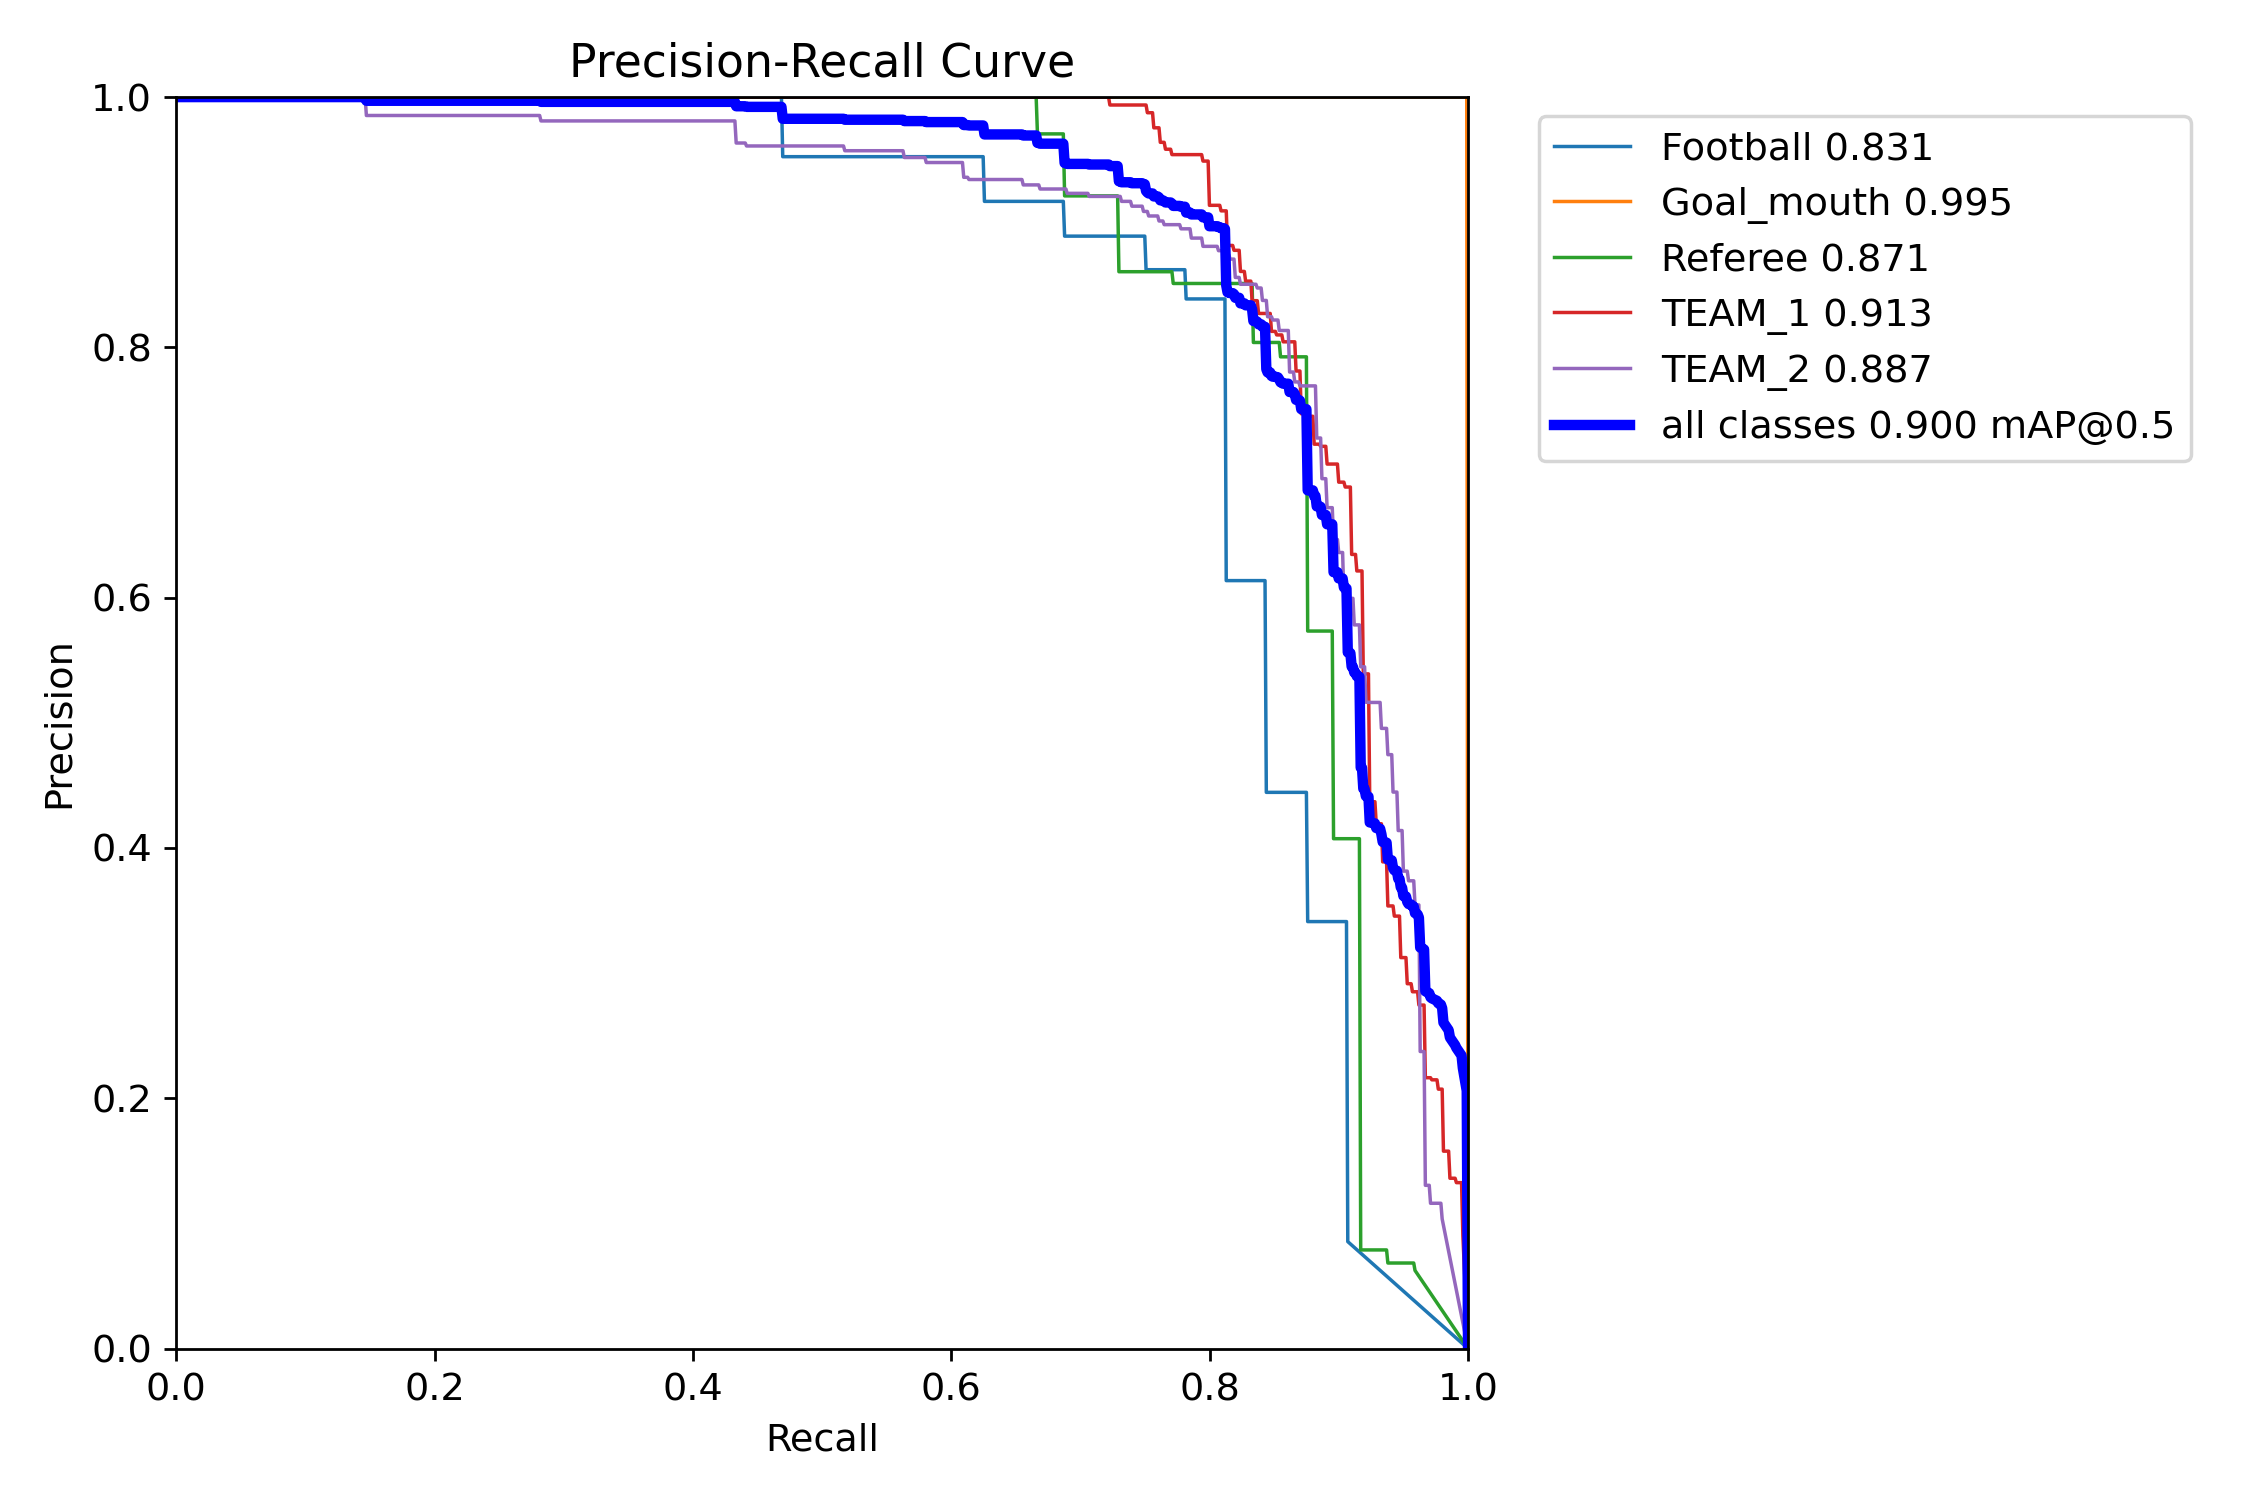

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=700)

The precision-recall curve illustrates the balance between precision and recall at various thresholds. A large area under the curve indicates high precision and high recall. High precision is associated with a low false positive rate, while high recall is associated with a low false negative rate. In our case, this model is performing quite well.

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.210 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Footbal-players-detection-3/valid/labels.cache... 59 images, 0 backgrounds, 0 corrupt: 100% 59/59 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:08<00:00,  2.10s/it]
                   all         59        549      0.852       0.86        0.9      0.672
              Football         59         32      0.835      0.788      0.831      0.637
            Goal_mouth         59         22       0.97          1      0.995      0.845
               Referee         59         48      0.848      0.811      0.872      0.608
                TEAM_1         59        209      0.836      0.833      0.914      0.646
                TEAM_2         59        238      0.775      0.866      0.888      0.623
Speed: 4.9ms preprocess, 2

In [ ]:
# Examples of detections on the validation batch
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=1700)

#Dataset

NDA to obtain the password:

https://docs.google.com/forms/d/e/1FAIpQLSfYFqjZNm4IgwGnyJXDPk2Ko_lZcbVtYX73w5lf6din5nxfmA/viewform

In [ ]:
from SoccerNet.Downloader import SoccerNetDownloader

mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory=r"M:\\videos\\videos_Todos\\") # Path to locate the videos

# Download videos from SoccerNet
# You will need the NDA password to download the videos
mySoccerNetDownloader.password = "***" # Replace with your NDA password
mySoccerNetDownloader.downloadGames(files=["1_720p.mkv", "2_720p.mkv"], split=["train", "valid", "test", "challenge"]) # Download videos in 720p
mySoccerNetDownloader.downloadGames(files=["Labels-v2.json"], split=["train","valid","test"])


## Code to obtain data to Train Yolo model

This code is used to obtain frames from the downloaded videos with the aim of labeling them and training the YOLO model.

In [ ]:
import cv2
import numpy as np
import os
import random

def extract_frames(video_path, output_folder, num_frames=10):
    # Opens the video
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Generates random numbers for the frames to be extracted
    frames_to_capture = sorted(random.sample(range(total_frames), min(num_frames, total_frames)))

    frame_count = 0
    extracted_count = 0

    while True:
        ret, frame = cap.read()

        # If the end of the video is reached or the required frames have been extracted, stop
        if not ret or extracted_count == len(frames_to_capture):
            break

        if frame_count in frames_to_capture:
            # Save the frame
            cv2.imwrite(os.path.join(output_folder, f"frame_{frame_count}_{os.path.basename(video_path)}.jpg"), frame)
            extracted_count += 1

        frame_count += 1

    cap.release()

def search_and_extract_frames(folder_path, output_folder):
    # Make sure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Traverse the directory and its subdirectories
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.mp4', '.avi', '.mov', '.mkv')):  # Add more formats if necessary
                video_path = os.path.join(root, file)
                extract_frames(video_path, output_folder)

# Define the source and destination folder
source_folder = r'M:\\videos\\videos_Todos\\england_epl\\'
destination_folder = r'M:\\videos\\frames_anotar\\'

search_and_extract_frames(source_folder, destination_folder)


#Inference with the Yolo Model

The pre-trained Yolo model is loaded, and for each video, the bounding boxes of the players for each team are calculated. As a result, a 30-second video is created with the boxes, and a Json file with the data is generated

In [ ]:
import os
import json
import cv2
from ultralytics import YOLO

# Function to convert game time to frame number
def time_to_frame(game_time, fps, offset=1):
    minutes, seconds = map(int, game_time.split(' - ')[1].split(':'))
    return int((minutes * 60 + seconds + offset) * fps)

# Load a pre-trained YOLOv8n model
model = YOLO('/content/drive/MyDrive/1. projects/work fiver/projects/11.11.23_football_detection/best.pt')

# Main path where the folders with JSON and videos are located
main_path = '/content/drive/MyDrive/1. projects/work fiver/projects/11.11.23_football_detection/final_model'

# Path to create the folder
folder_path = '/content/result/Yolo'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created.")
else:
    print(f"The folder '{folder_path}' already exists.")

# Path to save JSON predictions
destination_path = '/content/result/Yolo'

# Iterate through all subfolders within the main folder
for subdir, _, _ in os.walk(main_path):
    json_path = os.path.join(subdir, 'Labels-v2.json')
    if os.path.exists(json_path):
        print(f"Found JSON: {json_path}")
        with open(json_path, 'r') as file:
            data = json.load(file)

        # Extract the video URL from the JSON and complete the path
        video_folder_url = data["UrlLocal"]
        video_folder_path = os.path.join(main_path, video_folder_url)

        # Assuming video file names are '1_720p.mkv' and '2_720p.mkv'
        first_half_video_path = os.path.join(video_folder_path, '1_720p.mkv')
        second_half_video_path = os.path.join(video_folder_path, '2_720p.mkv')
        print(f"Video paths: {first_half_video_path}, {second_half_video_path}")

        # Check if the videos exist before proceeding
        if not os.path.exists(first_half_video_path) or not os.path.exists(second_half_video_path):
            print(f"No videos found for {subdir}. Processing stopped.")
            break

        # Extract interesting plays (shots on goal and goals)
        interesting_plays = [a for a in data["annotations"] if a["label"] in ["Shots on target", "Shots off target", "Goal"]]
        print(f"Found {len(interesting_plays)} interesting plays")

        # Create a folder for each match in the destination path
        match_name = os.path.basename(subdir)
        match_folder_path = os.path.join(destination_path, match_name)
        if not os.path.exists(match_folder_path):
            os.makedirs(match_folder_path)

        # Process each interesting play
        for index, play in enumerate(interesting_plays):
            game_time = play['gameTime']
            game_half = int(game_time.split(' - ')[0])

            # Determine which video to use based on the half number
            video_path = first_half_video_path if game_half == 1 else second_half_video_path
            cap = cv2.VideoCapture(video_path)
            if not cap.isOpened():
                print(f"Could not open video: {video_path}")
                break  # Exit the loop if the video cannot be opened

            fps = cap.get(cv2.CAP_PROP_FPS)
            width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

            initial_frame = time_to_frame(game_time, fps) - int(30 * fps)  # Go back 30 seconds
            cap.set(cv2.CAP_PROP_POS_FRAMES, max(initial_frame, 0))

            # Add a half-time indication to the file name
            half_indicator = 'first_half' if game_half == 1 else 'second_half'
            file_name = os.path.basename(subdir) + f'_play_{index}_{half_indicator}'
            saved_video_path = os.path.join(match_folder_path, file_name + '.mp4')
            saved_json_path = os.path.join(match_folder_path, file_name + '.json')

            out = cv2.VideoWriter(saved_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
            predictions = []

            # Determine if the play is a goal
            is_goal = 1 if play['label'] == "Goal" else 0

            # Process 30 seconds from the initial frame
            for frame_number in range(int(30 * fps)):
                ret, frame = cap.read()
                if not ret:
                    print(f"Could not read frame {frame_number}")
                    break

                results = model(frame)
                result = results[0]
                bboxes = result.boxes.xyxy.cpu().numpy()
                confidences = result.boxes.conf.cpu().numpy()
                labels = [result.names[int(cls)] for cls in result.boxes.cls.cpu().numpy()]

                for bbox, conf, label in zip(bboxes, confidences, labels):
                    x1, y1, x2, y2 = map(int, bbox)
                    frame = cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(frame, f'{label} {conf:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                frame_predictions = {
                    'frame': frame_number,
                    'predictions': [{'bbox': bbox.tolist(), 'confidence': float(conf), 'label': label} for bbox, conf, label in zip(bboxes, confidences, labels)],
                    'is_goal': is_goal
                }
                predictions.append(frame_predictions)

                out.write(frame)

            out.release()
            cap.release()
            print(f"Processed video saved in {saved_video_path}")

            with open(saved_json_path, 'w') as f:
                json.dump(predictions, f)
                print(f"Predictions saved in {saved_json_path}")

        if not cap.isOpened():
            print(f"No more videos found to process in {subdir}")
            continue  # Exit the subfolder loop if a video cannot be opened


##Frame-by-frame visualization

In [ ]:
import cv2
from matplotlib import pyplot as plt

video_path = '/content/datasets/morocco_res.mp4'

cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, 42) # Read the 40th frame of the prediction video output

ret, frame = cap.read()

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame_rgb)
plt.axis('off')
plt.show()

cap.release()

#Model Only JSON

This code is identical to the previous one, but the difference is that it does not generate videos, only the Json file with the bounding boxes, which is what we will use to train the model.

In [ ]:
import os
import json
import cv2
from ultralytics import YOLO

# Function to convert game time to frame number
def time_to_frame(game_time, fps, offset=1):
    minutes, seconds = map(int, game_time.split(' - ')[1].split(':'))
    return int((minutes * 60 + seconds + offset) * fps)

# Load a pre-trained YOLOv8n model
model = YOLO('/content/drive/MyDrive/1. projects/work fiver/projects/11.11.23_football_detection/best.pt')

# Main path where folders with JSON and videos are located
main_path = '/content/drive/MyDrive/1. projects/work fiver/projects/11.11.23_football_detection/final_model'

# Path to create the folder
folder_path = '/content/result/Yolo'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created.")
else:
    print(f"The folder '{folder_path}' already exists.")

# Path to save JSON predictions
destination_path = '/content/result/Yolo'

# Iterate through all subfolders within the main folder
for subdir, _, _ in os.walk(main_path):
    json_path = os.path.join(subdir, 'Labels-v2.json')
    if os.path.exists(json_path):
        print(f"Found JSON: {json_path}")
        with open(json_path, 'r') as file:
            data = json.load(file)

        # Extract the video URL from the JSON and complete the path
        video_folder_url = data["UrlLocal"]
        video_folder_path = os.path.join(main_path, video_folder_url)

        # Assuming video file names are '1_720p.mkv' and '2_720p.mkv'
        first_half_video_path = os.path.join(video_folder_path, '1_720p.mkv')
        second_half_video_path = os.path.join(video_folder_path, '2_720p.mkv')
        print(f"Video paths: {first_half_video_path}, {second_half_video_path}")

        # Check if the videos exist before proceeding
        if not os.path.exists(first_half_video_path) or not os.path.exists(second_half_video_path):
            print(f"No videos found for {subdir}. Processing stopped.")
            continue

        # Extract interesting plays (shots on goal and goals)
        interesting_plays = [a for a in data["annotations"] if a["label"] in ["Shots on target", "Shots off target", "Goal"]]
        print(f"Found {len(interesting_plays)} interesting plays")

        # Create a folder for each match in the destination path
        match_name = os.path.basename(subdir)
        match_folder_path = os.path.join(destination_path, match_name)
        if not os.path.exists(match_folder_path):
            os.makedirs(match_folder_path)

        # Process each interesting play
        for index, play in enumerate(interesting_plays):
            game_time = play['gameTime']
            game_half = int(game_time.split(' - ')[0])

            # Determine which video to use based on the half number
            video_path = first_half_video_path if game_half == 1 else second_half_video_path
            cap = cv2.VideoCapture(video_path)
            if not cap.isOpened():
                print(f"Could not open video: {video_path}")
                continue

            fps = cap.get(cv2.CAP_PROP_FPS)

            initial_frame = time_to_frame(game_time, fps) - int(30 * fps)  # Go back 30 seconds
            cap.set(cv2.CAP_PROP_POS_FRAMES, max(initial_frame, 0))

            # Add a half-time indication to the file name
            half_indicator = 'first_half' if game_half == 1 else 'second_half'
            file_name = os.path.basename(subdir) + f'_play_{index}_{half_indicator}'
            saved_json_path = os.path.join(match_folder_path, file_name + '.json')

            predictions = []

            # Determine if the play is a goal
            is_goal = 1 if play['label'] == "Goal" else 0

            # Process 30 seconds from the initial frame
            for frame_number in range(int(30 * fps)):
                ret, frame = cap.read()
                if not ret:
                    print(f"Could not read frame {frame_number}")
                    break

                results = model(frame)
                result = results[0]
                bboxes = result.boxes.xyxy.cpu().numpy()
                confidences = result.boxes.conf.cpu().numpy()
                labels = [result.names[int(cls)] for cls in result.boxes.cls.cpu().numpy()]

                frame_predictions = {
                    'frame': frame_number,
                    'predictions': [{'bbox': bbox.tolist(), 'confidence': float(conf), 'label': label} for bbox, conf, label in zip(bboxes, confidences, labels)],
                    'is_goal': is_goal
                }
                predictions.append(frame_predictions)

            cap.release()
            print(f"Video processing for {video_path} completed.")

            with open(saved_json_path, 'w') as f:
                json.dump(predictions, f)
                print(f"Predictions saved in {saved_json_path}")

        if not cap.isOpened():
            print(f"No more videos found to process in {subdir}")
            continue


#Creation of the players' position and formation

In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt


# Path to create the folder
folder_path = '/content/result'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created.")
else:
    print(f"The folder '{folder_path}' already exists.")

# Directory containing JSON files and the output directory
input_directory = '/content/result/Yolo'
output_directory = '/content/Results/'

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Search for all JSON files in the directory and subdirectories
json_files = []
for subdir, dirs, files in os.walk(input_directory):
    for file in files:
        if file.endswith('.json'):
            json_files.append(os.path.join(subdir, file))

# Functions to analyze and calculate formations
def analyze_formations(frame_data):
    team_1_positions, team_2_positions = [], []
    for prediction in frame_data['predictions']:
        bbox = prediction['bbox']
        x_center = (bbox[0] + bbox[2]) / 2  # X position of the player
        if prediction['label'] == 'TEAM_1':
            team_1_positions.append(x_center)
        elif prediction['label'] == 'TEAM_2':
            team_2_positions.append(x_center)
    return np.array(team_1_positions), np.array(team_2_positions)

def calculate_formation(team_positions, field_width):
    third = field_width / 3
    defense_zone = (0, third)
    midfield_zone = (third, 2 * third)
    attack_zone = (2 * third, field_width)
    defense = np.sum((defense_zone[0] <= team_positions) & (team_positions < defense_zone[1]))
    midfield = np.sum((midfield_zone[0] <= team_positions) & (team_positions < midfield_zone[1]))
    attack = np.sum((attack_zone[0] <= team_positions) & (team_positions <= attack_zone[1]))
    return f"{defense}-{midfield}-{attack}"

field_width = 1000  # Width of the playing field

# Process each JSON file
for json_file in json_files:
    with open(json_file, 'r') as f:
        predictions_data = json.load(f)

    # List to store the results of the current file
    results = []

    for frame_data in predictions_data:
        team_1_positions, team_2_positions = analyze_formations(frame_data)
        formation_1 = calculate_formation(team_1_positions, field_width)
        formation_2 = calculate_formation(team_2_positions, field_width)

        # Store the formation information along with the 'is_goal' data
        results.append({
            'frame': frame_data['frame'],
            'formation_1': formation_1,
            'formation_2': formation_2,
            'is_goal': frame_data['is_goal']
        })

    # Create a unique file name for the results based on the original file
    base_name = os.path.basename(json_file)
    result_file_name = f"{os.path.splitext(base_name)[0]}_result.json"
    output_file = os.path.join(output_directory, result_file_name)

    # Save the results of this JSON file in a separate file
    with open(output_file, 'w') as result_file:
        json.dump(results, result_file)

    print(f"Results from file {base_name} saved in {output_file}")


#Dataset Creation

In [ ]:
import os
import json
import pandas as pd

# Path to the directory where JSON files are located
directory_path = "/content/Results/"

# List to contain all the data
all_games_data = []

# Get a list of all JSON files in the directory
json_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.json')]

# Process each JSON file and extract the data
for json_path in json_files:
    with open(json_path, 'r') as file:
        game_data = json.load(file)
        # Create a list for the formations and the 'is_goal' result
        game_row = [f"{frame['formation_1']}_{frame['formation_2']}" for frame in game_data]
        # Add the 'is_goal' result of the play
        game_row.append(game_data[0]['is_goal'])  # Take the 'is_goal' value from the first frame
        # Add this list to the general container
        all_games_data.append(game_row)

# Convert into a Pandas DataFrame
columns = [f'frame_{i}' for i in range(len(all_games_data[0]) - 1)] + ['is_goal']
df_games = pd.DataFrame(all_games_data, columns=columns)

# Display the first rows of the resulting DataFrame
print(df_games.head())


       frame_0      frame_1      frame_2      frame_3      frame_4  \
0  0-1-0_0-0-0  0-1-0_0-0-0  0-1-0_0-0-0  0-1-0_0-0-0  0-1-0_0-0-0   
1  0-0-0_0-1-0  0-0-1_0-1-0  0-0-1_0-1-0  0-0-1_0-2-0  0-0-0_0-2-0   
2  0-0-1_0-3-2  0-0-0_3-3-1  0-1-0_2-3-1  0-0-0_0-3-3  0-0-1_1-3-2   
3  0-0-0_0-1-0  0-0-0_0-0-2  0-0-0_0-0-0  0-0-0_0-0-0  0-0-0_0-0-0   
4  1-3-0_1-4-6  1-3-0_1-5-6  3-3-0_0-6-5  2-2-1_0-4-6  1-2-2_0-3-6   

       frame_5      frame_6      frame_7      frame_8      frame_9  ...  \
0  0-1-0_0-0-0  0-1-0_0-1-0  0-1-0_0-1-0  0-1-0_0-1-0  0-1-0_0-0-0  ...   
1  0-1-0_2-0-0  0-0-0_1-0-0  0-1-0_1-0-0  0-1-0_1-0-0  0-1-0_1-0-0  ...   
2  0-0-1_0-3-2  0-0-1_0-3-2  0-0-0_0-3-2  0-1-0_0-3-2  0-1-1_0-4-2  ...   
3  0-0-0_0-0-0  0-0-0_0-0-0  0-0-0_0-0-0  0-0-0_0-0-0  0-0-0_0-0-0  ...   
4  2-2-2_1-3-5  2-1-1_1-3-5  2-1-1_1-4-5  2-1-2_1-4-6  2-2-1_1-4-7  ...   

     frame_741    frame_742    frame_743    frame_744    frame_745  \
0  1-4-4_0-3-3  1-3-5_0-2-3  1-4-4_1-2-4  1-4-5_0-3-3  1-3

#Model predictions of goals

In [ ]:
!pip install imbalanced-learn

##normal model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

# Assuming df_games is pre-loaded with the proper data structure
encoder = OneHotEncoder(sparse=False)
X = encoder.fit_transform(df_games.drop('is_goal', axis=1).apply(lambda x: '_'.join(x), axis=1).values.reshape(--1, 1))
y = df_games['is_goal'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)  # Train with the original training data

# Perform predictions on the test set
y_pred = model.predict(X_test)

# Calculate and display metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}")


#model with smote technique

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

# Assuming df_games is pre-loaded with the proper data structure
encoder = OneHotEncoder(sparse=False)
X = encoder.fit_transform(df_games.drop('is_goal', axis=1).apply(lambda x: '_'.join(x), axis=1).values.reshape(-1, 1))
y = df_games['is_goal'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling the minority class in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Perform predictions on the test set
y_pred = model.predict(X_test)

# Calculate and display metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.9512195121951219

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.00      0.00      0.00         1

    accuracy                           0.95        41
   macro avg       0.49      0.49      0.49        41
weighted avg       0.95      0.95      0.95        41

